### Decision Tree - Label Classification

In [2]:
import sys
sys.path.append('../../')

# Import libraries
from utils.load import load
from utils.score import fold_cross_validate, visualize_classification_result, visualize_feature_importance
from utils.print import print_cross_validation_scores, print_scores
from constant.columns import FEATURES, LABEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [53]:
# Import data
df = pd.read_csv('./source/dataset.csv')
X, y = df[FEATURES], df[LABEL]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

#### Cross Validation

In [54]:
# Define the model
clf_cv = DecisionTreeClassifier()
scores = fold_cross_validate(clf_cv, X_test, y_test)

# Print scores
print_cross_validation_scores(scores)

MACRO:
Precision: 0.5980 (0.1185)
Recall: 0.6170 (0.1352)
F1 score: 0.6055 (0.1249)
---------------------------------
MICRO:
Precision: 0.9093 (0.0408)
Recall: 0.9093 (0.0408)
F1 score: 0.9093 (0.0408)


In [5]:
# Best parameters: OrderedDict([('criterion', 'gini'), ('max_depth', 63), ('max_features', None), ('min_samples_leaf', 25), ('min_samples_split', 23)])

# Define the model
clf_cv = DecisionTreeClassifier(
    criterion='gini',
    max_depth=63,
    max_features=None,
    min_samples_leaf=25,
    min_samples_split=23
)
scores = fold_cross_validate(clf_cv, X, y)

# Print scores
print_cross_validation_scores(scores)

MACRO:
Precision: 0.6419 (0.0949)
Recall: 0.6011 (0.0799)
F1 score: 0.6092 (0.0841)
---------------------------------
MICRO:
Precision: 0.9320 (0.0238)
Recall: 0.9320 (0.0238)
F1 score: 0.9320 (0.0238)


#### Feature Importance

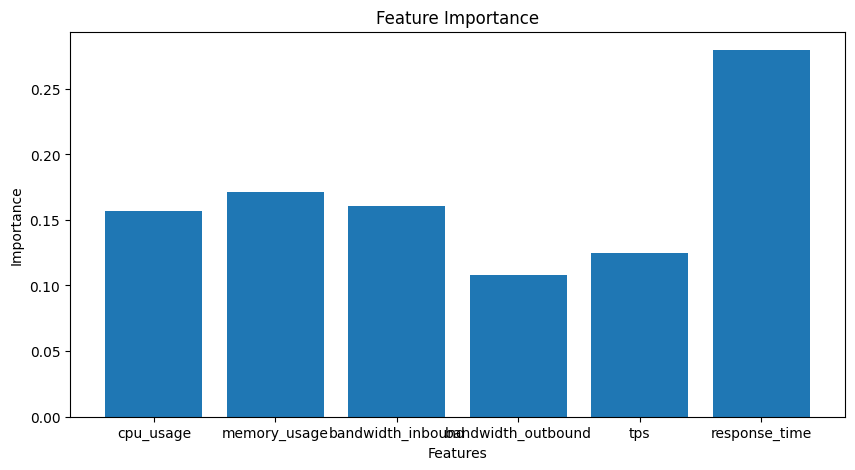

array([0.15666217, 0.17150215, 0.16032795, 0.1075915 , 0.12436613,
       0.2795501 ])

In [6]:
# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Get the feature importances
importance = clf.feature_importances_
visualize_feature_importance(importance, FEATURES)
clf.feature_importances_

#### Hyperparameter Tuning

In [7]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter space
search_space = {
    'max_depth': Integer(3, 100),  # Depth of the tree
    'min_samples_split': Integer(2, 100),  # Minimum number of samples required to split a node
    'min_samples_leaf': Integer(1, 100),  # Minimum number of samples required at a leaf node
    'criterion': Categorical(['gini', 'entropy']),  # Function to measure the quality of a split
    'max_features': Categorical(['auto', 'sqrt', 'log2', None]),  # Number of features to consider for best split
}

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier()

# Set up the BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=dt,
    search_spaces=search_space,
    n_iter=32,  # Number of iterations
    scoring='f1_macro',  # Use F1 macro score
    n_jobs=-1,  # Use all CPU cores
    cv=10,       # 10-fold cross-validation
)

# Perform the search
bayes_search.fit(X_train, y_train)

# Best parameters and score
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

# Print the best parameters and score
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: OrderedDict([('criterion', 'gini'), ('max_depth', 100), ('max_features', None), ('min_samples_leaf', 25), ('min_samples_split', 2)])
Best score: 0.6373151200849376


#### Train Model

In [8]:
# Create and train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Predict and print the score
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

Accuracy: 0.9233333333333333
Precision: 0.5263157894736842
Recall: 0.4166666666666667
F1: 0.46511627906976744


#### Visualize Result

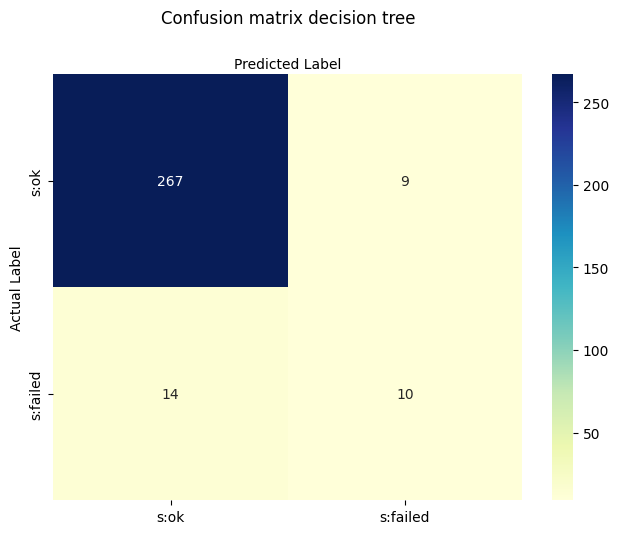

In [10]:
visualize_classification_result(y_test, y_pred)